### 1) Импорт библиотек

In [1]:
# Импортируем библиотеки, которые могут нам понадобиться для работы 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
import shap
from sklearn.model_selection import cross_val_score

### 2) Выбор оптимальной модели

Сравниваем несколько регрессионных моделей между собой, чтобы определить какая модель лучше подходит под наши данные. 
Для этого выбраны следующие модели:

1. Линейная регрессия (LinearRegression): Это одна из самых базовых и широко используемых моделей для решения задач регрессии. Она работает хорошо, когда существует линейная зависимость между признаками и целевой переменной. Линейная регрессия также является хорошим выбором для начального анализа, так как она позволяет легко интерпретировать влияние признаков на целевую переменную.

2. Ridge регрессия (Ridge Regression): Ridge регрессия предотвращает переобучение за счет добавления штрафа на коэффициенты модели. Это может быть полезно на небольших данных, чтобы избежать переобучения.

3. Lasso регрессия (Lasso Regression): Lasso регрессия также добавляет штраф на коэффициенты, но в отличие от Ridge, она способна проводить отбор признаков, устанавливая некоторые коэффициенты в нуль. Это может быть полезно на маленькой выборке, чтобы избежать переобучения и улучшить интерпретируемость модели.

4. ElasticNet регрессия (ElasticNet Regression): ElasticNet регрессия комбинирует свойства Ridge и Lasso регрессии, что позволяет учесть как L1, так и L2 регуляризацию. Это может быть полезно на небольших данных, чтобы учесть различные типы зависимостей между признаками и целевой переменной.

5. Случайный лес (RandomForestRegressor): Случайный лес является ансамблевой моделью, основанной на решающих деревьях, и часто показывает более высокую точность прогнозирования за счет уменьшения переобучения. Он хорошо работает на большинстве наборов данных и является одним из "стандартных" выборов для многих задач регрессии.

6. Метод опорных векторов (SVR): Метод опорных векторов для регрессии может быть эффективным на данных с высокой размерностью и когда количество образцов не очень велико. SVR может работать как с линейными, так и с нелинейными зависимостями благодаря использованию различных ядер.

7. Градиентный бустинг (GradientBoostingRegressor): Это ансамблевая модель, основанная на методе градиентного бустинга, которая обучает последовательно добавляемые деревья решений для исправления ошибок предыдущих, обладая способностью обрабатывать сложные зависимости между признаками и целевой переменной, при этом имея меньшую склонность к переобучению, высокую точность прогнозирования, некоторую интерпретируемость и гибкость для различных задач регрессии, делая его мощным инструментом в машинном обучении.

Выбор этих моделей позволяет охватить широкий спектр потенциальных зависимостей в данных: от линейных до нелинейных, а также предоставляет возможность использовать как простые, так и более сложные подходы. Это делает наш поиск более всесторонним и повышает вероятность нахождения подходящей модели для конкретного набора данных.

In [2]:
# Загрузим датасета (для этого предварительно сохраним csv в ту же папку, где находится исполняемый файл кода)
df = pd.read_csv('датасет.csv', index_col=[0]) # 
# Выведем первые 5 строк таблицы
df.head()

,Кол-во структурированных типов,Кол-во полуструктурированных типов,"FPD, файлов/д",Кол-во страниц в документе в среднем,Кол-во страниц в документе максимум,Кол-во полей к извлечению в среднем в документе,Кол-во полей к извлечению максимум в документе,Стоимость AFC,Стоимость ML,Стоимость LLM
№,,,,,,,,,,
1,20.0,2.0,640.0,30.0,600,38.0,155,12412.711,63217.126,20433.325
2,22.0,0.0,4300.0,11.0,100,14.0,32,10849.388,12386.376,34553.425
3,0.0,1.0,15000.0,20.0,300,117.0,117,15474.457,25293.489,194240.175
4,0.0,1.0,8700.0,5.0,10,252.0,252,11297.210,50443.148,34513.879
5,3.0,1.0,6000.0,15.0,20,94.0,121,12048.757,25373.565,62198.362


In [3]:
# Выведем перечень столбцов таблицы
df.columns

Index(['Кол-во структурированных типов', 'Кол-во полуструктурированных типов',
       'FPD, файлов/д', 'Кол-во страниц в документе в среднем',
       'Кол-во страниц в документе максимум',
       'Кол-во полей к извлечению в среднем в документе',
       'Кол-во полей к извлечению максимум в документе', 'Стоимость AFC',
       'Стоимость ML', 'Стоимость LLM'],
      dtype='object')

In [4]:
# Зададим независимые переменные (X) и зависимую переменную (y) для AFC
y = df['Стоимость AFC']
X = df[['Кол-во структурированных типов', 
        'Кол-во полуструктурированных типов',
        'FPD, файлов/д', 
        'Кол-во страниц в документе в среднем',
       'Кол-во страниц в документе максимум',
       'Кол-во полей к извлечению в среднем в документе',
       'Кол-во полей к извлечению максимум в документе']]

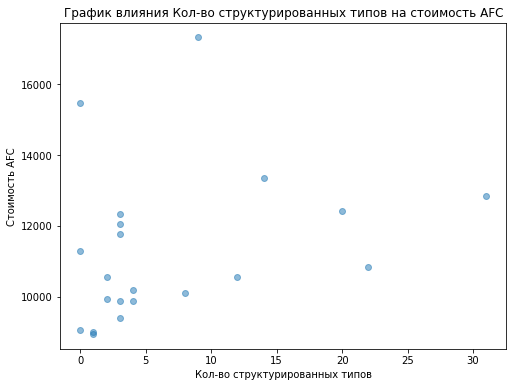

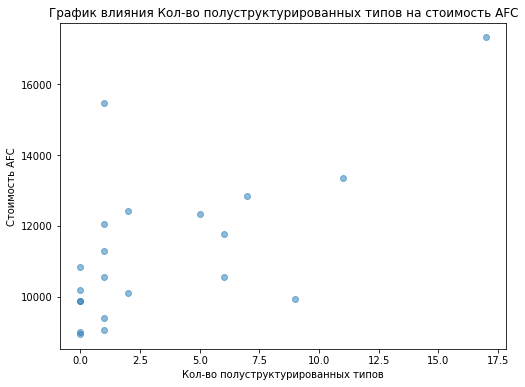

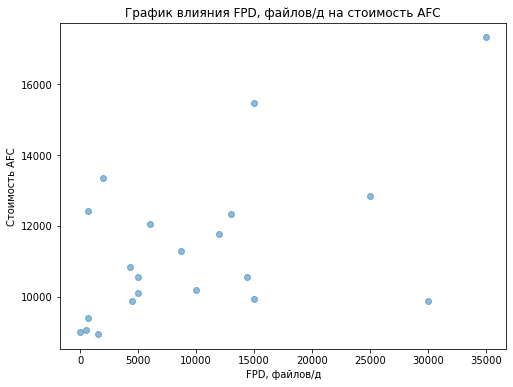

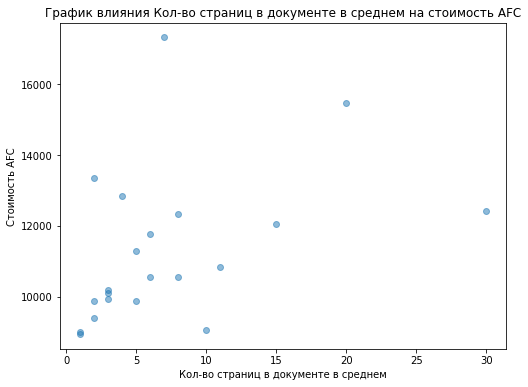

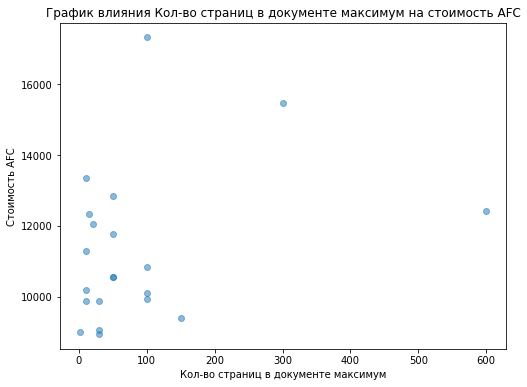

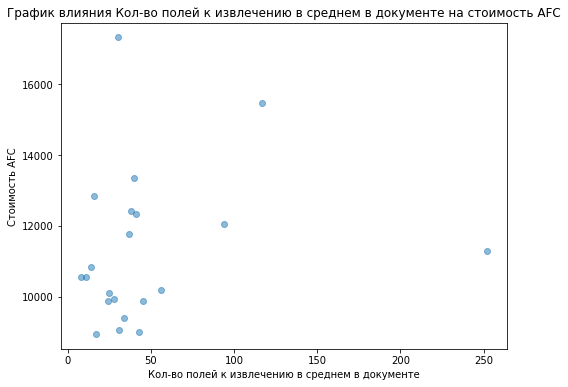

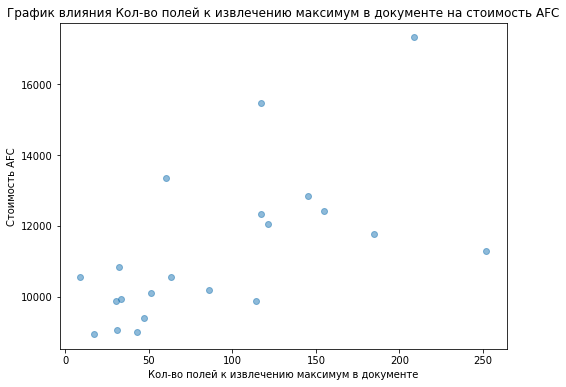

In [5]:
# Построим отдельные графики для каждого признака X
for feature_X in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature_X], y, alpha=0.5)
    plt.title(f'График влияния {feature_X} на cтоимость AFC')
    plt.xlabel(feature_X)
    plt.ylabel('Стоимость AFC')
    plt.show()

Для оценки качества нашей модели регрессии мы выбрали метрику MAPE.  

MAPE (Mean Absolute Percentage Error) - средняя абсолютная процентная ошибка, которая измеряет среднее абсолютное отклонение предсказанных значений от фактических значений в процентном выражении. MAPE полезна, когда важно оценивать точность прогнозов в процентном соотношении.Чем ближе значение MAPE к нулю, тем лучше качество предсказаний модели. 

Для того чтобы рассчитать MAPE, нужно выполнить следующие шаги:

1. Для каждого прогноза посчитать абсолютное значение разницы между фактическим значением и прогнозом.
2. Затем вычислить процентное отклонение для каждого прогноза, разделив абсолютное значение разницы на фактическое значение и умножив на 100%.
3. После этого сложить все процентные отклонения и поделить на общее количество прогнозов, чтобы получить среднее значение процентных отклонений.


Эта метрика помогает оценить точность модели и понять, насколько близки наши прогнозы к реальным значениям.

In [13]:
# Разделим данных на обучающую и тестовую выборки (тестовую выборку возьмем равной 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Список моделей для сравнения
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor(),
    'SVR': SVR(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

# Создадим пустой словарь, который в будущем будем заполнять названием модели и значением метрики для нее 
results = {}

# Обучим каждую модель и расчитаем MAPE на тестовом наборе
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    results[name] = MAPE
    print(f"{name}: MAPE = {MAPE:.4f}")

# Вывод лучшей модели
best_model_name = min(results, key=results.get)
best_mean_absolute_percentage_error = results[best_model_name]
print(f"\nЛучшая модель: {best_model_name} с MAPE = {best_mean_absolute_percentage_error:.4f}")

LinearRegression: MAPE = 0.1768
Ridge: MAPE = 0.1767
Lasso: MAPE = 0.1767
ElasticNet: MAPE = 0.1759
RandomForestRegressor: MAPE = 0.0892
SVR: MAPE = 0.0906
GradientBoostingRegressor: MAPE = 0.1013

Лучшая модель: RandomForestRegressor с MAPE = 0.0892


Чаще всего мы получаем меньший MAPE для RandomForestRegressor. Берем эту модель для дальнейшего построения

### 3) Поиск лучших параметров для RandomForestRegressor()

In [7]:
# Мы ранее уже определили X и y, а также разделили выборку на тестовую и обучающую. 
# Теперь задаем модель, с которой мы определлились выше
model = RandomForestRegressor()

# Определяем параметры сетки для поиска
param_grid = {
#   'n_estimators': [50, 100, 200], # первый прогон сетки, получили лучшее значене 50, детализируем
    'n_estimators': [10, 20, 30, 40, 50, 60, 70],  # детализируем
#   'n_estimators': [5, 10, 15, 20, 25],
    'criterion': ["absolute_error"], # ставим absolute_error для согласованности с метрикой MAPE
    'max_depth': [None, 10, 20], # первый прогон сетки, получили лучшее значене 20, детализируем
#   'max_depth': [None, 10, 20, 30, 40, 50],
#   'min_samples_split': [2, 5, 10], - получили что лучшим является 2, что является значением по умолчанию, поэтому исключаем из сетки
#   'min_samples_leaf': [1, 2] - получили что лучшим является 1, что является значением по умолчанию, поэтому исключаем из сетки
}

# Создаем объект scorer с использованием MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Настраиваем решетчатый поиск
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=mape_scorer)

# Выполняем решетчатый поиска
grid_search.fit(X_train, y_train)

print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid_search.best_params_))
print("Средняя MAPE для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(-grid_search.best_score_)) 
print("MAPE для наилучшей модели на тестовом наборе: {:.6f}\n".format(mean_absolute_percentage_error(y_test, grid_search.predict(X_test))))

# Выводим результаты решетчатого поиска в виде DataFrame
grid_results = pd.DataFrame(grid_search.cv_results_)
display(grid_results.sort_values(["rank_test_score", "std_test_score"]).T)


----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'criterion': 'absolute_error', 'max_depth': None, 'n_estimators': 70}

Средняя MAPE для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.117549

MAPE для наилучшей модели на тестовом наборе: 0.090613



,6,10,20,19,12,17,9,4,2,0,...,18,13,5,15,8,1,16,3,7,14
mean_fit_time,0.0728,0.037092,0.062811,0.054845,0.057786,0.036653,0.02874,0.048567,0.030028,0.015169,...,0.045544,0.06743,0.054442,0.019649,0.022142,0.020825,0.027763,0.040921,0.014358,0.010692
std_fit_time,0.007553,0.000237,0.000364,0.00046,0.002572,0.000432,0.000417,0.00088,0.000968,0.001612,...,0.000378,0.000731,0.000627,0.000082,0.002152,0.001402,0.000107,0.000584,0.000355,0.000118
mean_score_time,0.005743,0.003146,0.004489,0.004123,0.004383,0.003063,0.0027,0.003895,0.002892,0.002359,...,0.003595,0.004883,0.004152,0.002194,0.002475,0.002229,0.00266,0.003625,0.002443,0.001638
std_score_time,0.000799,0.00006,0.000038,0.000068,0.000248,0.000016,0.000049,0.000208,0.000183,0.000177,...,0.000099,0.000034,0.00011,0.000051,0.000223,0.00005,0.000126,0.000187,0.000057,0.000003
param_criterion,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,...,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error
param_max_depth,None,10,20,20,10,20,10,None,None,None,...,20,10,None,20,10,None,20,None,10,20
param_n_estimators,70,40,70,60,60,40,30,50,30,10,...,50,70,60,20,20,20,30,40,10,10
params,"{'criterion': 'absolute_error', 'max_depth': N...","{'criterion': 'absolute_error', 'max_depth': 1...","{'criterion': 'absolute_error', 'max_depth': 2...","{'criterion': 'absolute_error', 'max_depth': 2...","{'criterion': 'absolute_error', 'max_depth': 1...","{'criterion': 'absolute_error', 'max_depth': 2...","{'criterion': 'absolute_error', 'max_depth': 1...","{'criterion': 'absolute_error', 'max_depth': N...","{'criterion': 'absolute_error', 'max_depth': N...","{'criterion': 'absolute_error', 'max_depth': N...",...,"{'criterion': 'absolute_error', 'max_depth': 2...","{'criterion': 'absolute_error', 'max_depth': 1...","{'criterion': 'absolute_error', 'max_depth': N...","{'criterion': 'absolute_error', 'max_depth': 2...","{'criterion': 'absolute_error', 'max_depth': 1...","{'criterion': 'absolute_error', 'max_depth': N...","{'criterion': 'absolute_error', 'max_depth': 2...","{'criterion': 'absolute_error', 'max_depth': N...","{'criterion': 'absolute_error', 'max_depth': 1...","{'criterion': 'absolute_error', 'max_depth': 2..."
split0_test_score,-0.067618,-0.078065,-0.063874,-0.070332,-0.071507,-0.077909,-0.086412,-0.081148,-0.080165,-0.063152,...,-0.075053,-0.072924,-0.077246,-0.086982,-0.04993,-0.084211,-0.082852,-0.0876,-0.145633,-0.139246
split1_test_score,-0.155205,-0.145676,-0.163898,-0.162753,-0.151169,-0.150952,-0.164314,-0.159364,-0.157933,-0.147606,...,-0.161199,-0.164553,-0.164366,-0.16616,-0.186337,-0.171804,-0.179803,-0.1689,-0.185763,-0.185189


По итогу получаем, что чаще всего модель выдавала лучшие показатели при:
* n_estimators=20
* criterion="absolute_error"
* max_depth=10
* min_samples_split=2 (по-умолчанию, можно в модель не включать)
* min_samples_leaf=1 (по-умолчанию, можно в модель не включать)


In [8]:
# Строим итоговую модель
model_result = RandomForestRegressor(criterion="absolute_error", max_depth=10, n_estimators=20)
model_result.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = model_result.predict(X_test)

# Оценка качества модели
print('Train MAPE: ', mean_absolute_percentage_error(y_train, model_result.predict(X_train)))
print('Test MAPE:  ', mean_absolute_percentage_error(y_test, y_pred))


Train MAPE:  0.04540192762810097
Test MAPE:   0.09105935263393687


### 4) Анализ получившейся модели

In [9]:
# Проведем кросс-валидацию для оценки обобщающей способности модели.
scores = cross_val_score(model_result, X, y, cv=3)  # cv=3 означает 5 фолдов

# Вывод результатов
print("Средняя оценка кросс-валидации:", scores.mean())

Средняя оценка кросс-валидации: -0.2883077086330638


Оценка кросс-валидации небольшая, причина таких результатов вероятнее всего в довольно маленькой выборке данных, модель может иметь трудности в обобщении и показывать низкие оценки кросс-валидации.


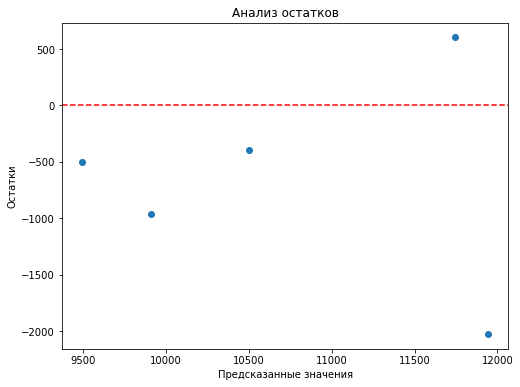

In [10]:
# Проведем анализ остатков. Они не должны демонстрировать явные систематические паттерны
residuals = y_test - y_pred

# Визуализация остатков(разница между фактическими и предсказанными значениями) в виде диаграммы рассеяния 
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Анализ остатков')
plt.show()

# 1. На оси X отложены предсказанные значения (y_pred).
# 2. На оси Y отложены остатки (residuals), то есть разница между фактическими значениями (y_test) и предсказанными (y_pred).
# 3. Красная пунктирная линия проходит через ноль на оси Y. Распределение остатков вокруг нулевого значения является желательным результатом.


Как видим, график имеет минимум 1 выброс (точку, далеко стоящую от нуля), вероятнее всего причина в нашей небольшой выборке (всего 21 измерение). Это не критично для нашей модели.

На графике нет явных закономерностей в распределении остатков.


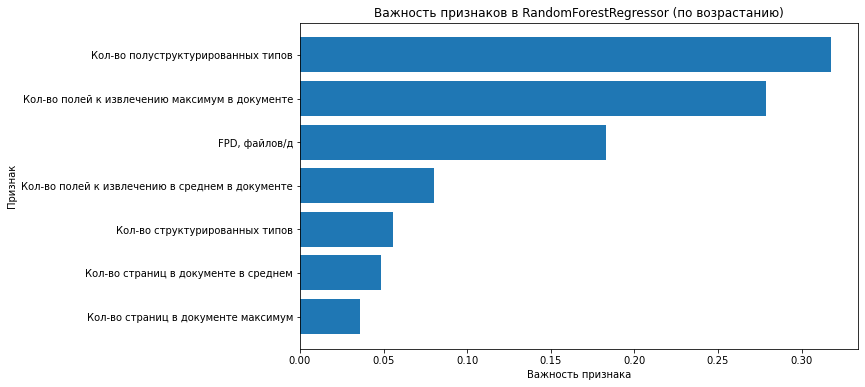

                                           Признак  Важность
1               Кол-во полуструктурированных типов  0.317863
6   Кол-во полей к извлечению максимум в документе  0.278804
2                                    FPD, файлов/д  0.183226
5  Кол-во полей к извлечению в среднем в документе  0.080238
0                   Кол-во структурированных типов  0.055628
3             Кол-во страниц в документе в среднем  0.048382
4              Кол-во страниц в документе максимум  0.035859


In [11]:
# Посмотрим насколько признаки, используемые в нашей модели, важны
# Получим индексы отсортированных значений важности признаков
feature_importances = model_result.feature_importances_
sorted_indices = np.argsort(feature_importances)
feature_names = X.columns

# Отсортируем значения важности и названий признаков
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Визуализируем отсортированные важности признаков
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в RandomForestRegressor (по возрастанию)')
plt.show()

feature_importances = model_result.feature_importances_
feature_importance_df = pd.DataFrame({'Признак': X.columns, 'Важность': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Важность', ascending=False)

print(feature_importance_df)

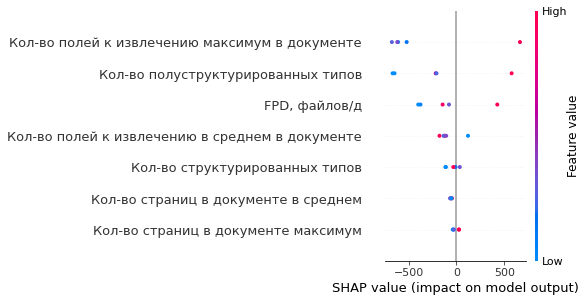

In [12]:
# Визуализруем вклад каждого признака в предсказания модели

explainer = shap.TreeExplainer(model_result)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Вклад признака в предсказание модели отображается цветом точек:
- Красный цвет указывает на более высокое значение признака, что оказывает положительный вклад в предсказание.
- Синий цвет указывает на более низкое значение признака, что оказывает отрицательный вклад в предсказание.

Положение точки по горизонтали показывает величину вклада признака в предсказание для конкретного примера данных. Чем дальше точка от нуля по горизонтали, тем больше вклад признака в предсказание. Положительные значения SHAP означают увеличение предсказания модели, а отрицательные - уменьшение.